In [104]:
from math import pi
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import random

In [105]:
def d1(S, K, T, r, q, sigma) -> float:
    ''' Calculation of conditional probability d1.

    Keyword arguments: 
    S -- Stock price at time zero
    K -- Option exercise price 
    T -- Time to maturity (in years)
    r -- Continuously compounded annual interest rate
    q -- Annual continuous dividend yield
    sigma -- Volatility 
    '''
    return(np.log(S/K) + (r - q + sigma ** 2/2.) * T)/(sigma * np.sqrt(T))

def d2(S, K, T, r, q, sigma) -> float:
    ''' Calculation of probability of option to expire
        in the money, d2.

    Keyword arguments: 
    S -- Stock price at time zero
    K -- Option exercise price 
    T -- Time to maturity (in years)
    r -- Continuously compounded annual interest rate
    q -- Annual continuous dividend yield
    sigma -- Volatility 
    '''
    return d1(S, K, T, r, q, sigma) - sigma * np.sqrt(T)

In [106]:
def black_scholes(S, K, T, r, q, sigma, flag = 'c') -> float:
    ''' Calculates the price of European call and put options.

    Keyword arguments: 
    S -- Stock price at time zero
    K -- Option exercise price 
    T -- Time to maturity (in years)
    r -- Continuously compounded annual interest rate
    q -- Annual continuous dividend yield
    sigma -- Volatility
    flag -- 'c' for call and 'p' for put (default = call) 
    '''
    if flag == 'c':
        return (S * np.exp(-q * T) * norm.cdf(d1(S, K, T, r, q, sigma))
                -K * np.exp(-r * T) * norm.cdf(d2(S, K, T, r, q, sigma)))
    else:
        return (K * np.exp(-r * T) * norm.cdf(-d2(S, K, T, r, q, sigma))
                -S * np.exp(-q * T) * norm.cdf(-d1(S, K, T, r, q, sigma)))

In [107]:
black_scholes(150, 155, 1, 0.05, 0.01, 0.2639, 'p')


15.006050828339738

In [108]:
def ISD(S, C, T) -> float:
    return np.sqrt(2 * pi/T) * (C/S)

In [109]:
isd = ISD(150,15,1)
print('Implied volatility: ', "{:.2%}".format(isd))
black_scholes(150, 155, 1, 0.05, 0.01, 0.2639, 'p')

Implied volatility:  25.07%


15.006050828339738

In [110]:
def Vega(S, K, T, r, q, sigma) -> float:
    ''' Calculates Vega.

    Keyword arguments: 
    S -- Stock price at time zero
    K -- Option exercise price 
    T -- Time to maturity (in years)
    r -- Continuously compounded annual interest rate
    q -- Annual continuous dividend yield
    sigma -- Volatility
    '''
    return S * norm.pdf(d1(S, K, T, r, q, sigma), 0, 1) * np.sqrt(T) * np.exp(-q * T)

In [111]:
def implied_volatility(S, K, T, C, r, q, flag = 'c', sigma = 0.30,  tol = 1e-5) -> float:
    ''' Estimates the implied volatility for a European option.

    Keyword arguments: 
    S -- Stock price at time zero
    K -- Option exercise price 
    T -- Time to maturity (in years)
    C -- Market price of option
    r -- Continuously compounded annual interest rate
    q -- Annual continuous dividend yield
    flag -- 'c' for call and 'p' for put (default = call)
    sigma -- Initial guess for implied volatility (default = 0.30)
    tol -- error tolerance (default = 1e-5)
    '''
    for _ in range(1000):
        sigma_new = sigma - ((black_scholes(S, K, T, r, q, sigma, flag) - C)
                            / Vega(S , K, T, r, q, sigma))
        if np.all(abs(sigma_new - sigma) < tol): 
            break
        sigma = sigma_new
    return sigma

In [112]:
implied_vol = implied_volatility(150, 155, 1, 15 ,0.05, 0.01, 'p')

print('Implied volatility: ', "{:.2%}".format(implied_vol))

print('Verifying market option value with BS and implied volatility: ', "{:.2f}".format(black_scholes(150, 155, 1.0, 0.05, 0.01, implied_vol, 'p')), '$')


Implied volatility:  26.38%
Verifying market option value with BS and implied volatility:  15.00 $


In [113]:
vega = Vega(150, 155, 1, 0.05, 0.01, 0.26)

print('Vega: ', "{:.2f}".format(vega))

Vega:  58.51


In [114]:
df = pd.read_csv('Task1cd_puts.csv', delimiter=";", header=0)
puts = np.array(df)
strikes, prices = puts[:,0], puts[:, 1]
iv = implied_volatility(150, strikes, 1, prices, 0.05, 0.01, 'put')
vegas = Vega(150, strikes, 1, 0.05, 0.01, iv)

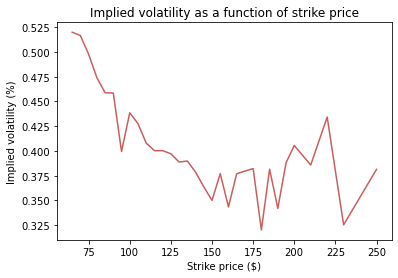

In [115]:
plt.plot(strikes, iv, color = 'indianred')
plt.xlabel("Strike price ($)")
plt.ylabel("Implied volatility (%)")
plt.title("Implied volatility as a function of strike price")
#plt.savefig('implied_volatility.pdf')
plt.show()

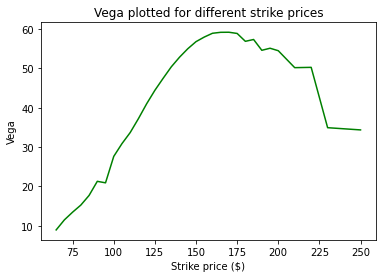

In [116]:
plt.plot(strikes, vegas, color = 'green')
plt.xlabel("Strike price ($)")
plt.ylabel("Vega")
plt.title("Vega plotted for different strike prices")
plt.savefig('vega.pdf') 
plt.show()

In [117]:
res = black_scholes(100, 100, 3, 0.04, 0.02, 0.20, 'p')
res

10.017080535490749

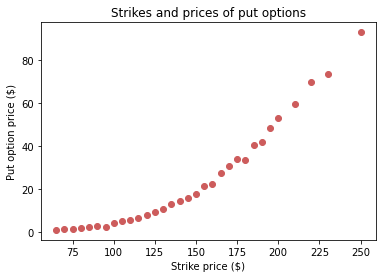

In [126]:
plt.scatter(strikes, prices, color = 'indianred')
plt.xlabel("Strike price ($)")
plt.ylabel("Put option price ($)")
plt.title("Strikes and prices of put options")
plt.savefig('puts.pdf')
plt.show()